<a href="https://colab.research.google.com/github/ekomissarov/data-analysis/blob/main/9_central_limit_theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
plt.style.use('dark_background')


In [2]:
n_obs = 10**6

uniform_rv = sts.uniform(loc=-1, scale=2)
x_1 = uniform_rv.rvs(n_obs)
x_2 = uniform_rv.rvs(n_obs)
x_3 = uniform_rv.rvs(n_obs)
x_4 = uniform_rv.rvs(n_obs)

In [3]:
np.sqrt(x_1.var())

0.5775573409651527

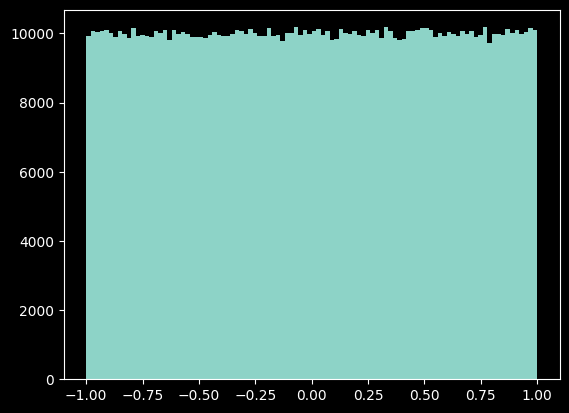

In [4]:
plt.hist(x_1, bins=100);

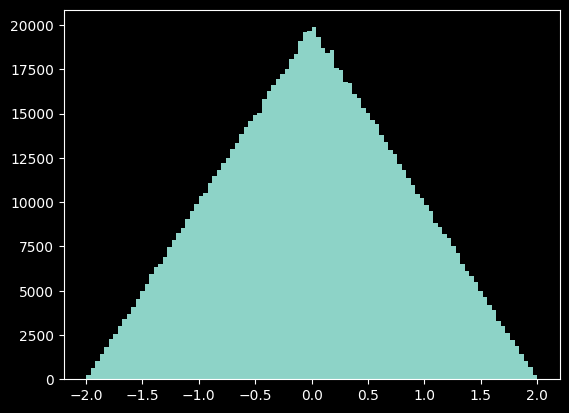

In [5]:
#plt.hist((x_1 + x_2)/(0.577*2**(1/2)), bins=100);  # need to be normalized to N(0,1)
plt.hist((x_1 + x_2), bins=100);

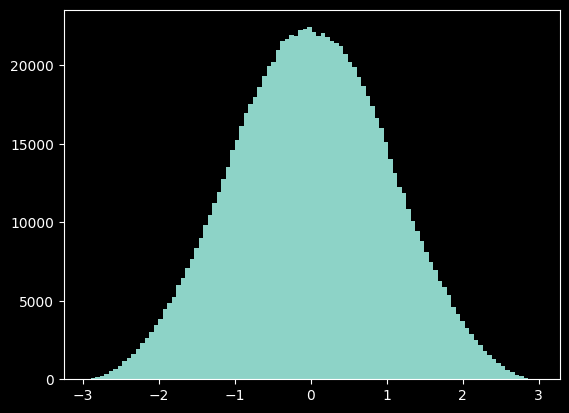

In [6]:
plt.hist(x_1 + x_2 + x_3, bins=100);

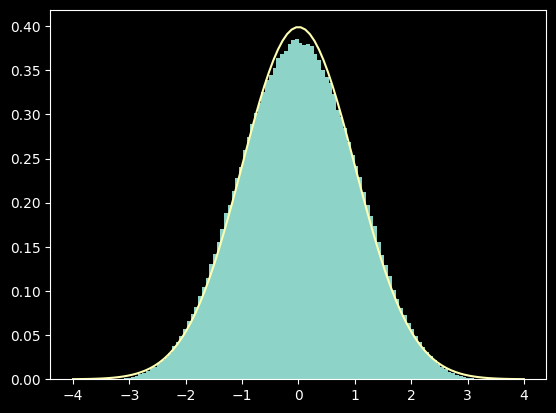

In [7]:
plt.hist((x_1 + x_2 + x_3 + x_4)/(0.577*4**(1/2)), bins=100, density=True);

# N(0,1) theoretical
x = np.linspace(-4, 4, 100)
pdf = sts.norm().pdf(x)
plt.plot(x, pdf);

# In practice, the CLT tells us that for large values
# we can replace the distribution of averages with a normal one and not make much of a mistake.

# The question arises: What are large values ​​of n? When does asymptotic behavior occur?
# It occurs differently for different distributions and natural phenomena.
# For a uniform distribution already for four terms, it quite closely resembles

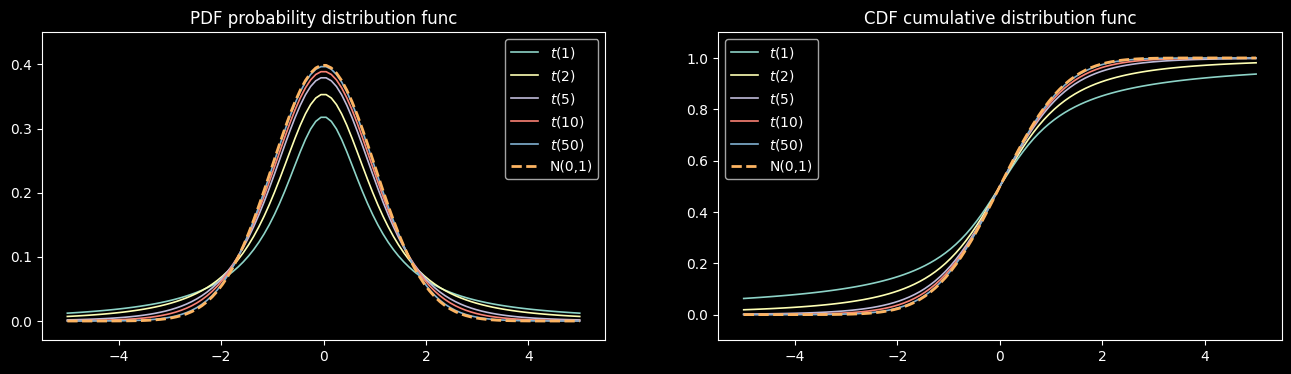

In [8]:
#distributional convergence example
x = np.linspace(-5,5,100)

fig, ax = plt.subplots(1,2,figsize=(16, 4))

for k in [1, 2, 5, 10, 50]:
    rv = sts.t(df=k)  # Student's distribution
    pdf = rv.pdf(x)
    cdf = rv.cdf(x)
    ax[0].plot(x, pdf, label="$t(%s)$" % k, lw=1.2)
    ax[1].plot(x, cdf, label="$t(%s)$" % k, lw=1.2)


rv_limit = sts.norm( )
pdf_limit = rv_limit.pdf(x)
cdf_limit = rv_limit.cdf(x)

ax[0].plot(x, pdf_limit, label='N(0,1)', linestyle='dashed', lw=2)
ax[0].set_ylim(-0.03,0.45)
ax[0].set_title("PDF probability distribution func")
ax[0].legend()

ax[1].set_ylim(-0.1,1.1)
ax[1].plot(x, cdf_limit, label='N(0,1)', linestyle='dashed', lw=2)
ax[1].set_title("CDF cumulative distribution func")
ax[1].legend();